In [7]:
!pip install jovian --upgrade --quiet
!pip install sklearn --quiet
!pip install matplotlib --quiet

     |████████████████████████████████| 11.6MB 3.1MB/s eta 0:00:01
     |████████████████████████████████| 2.2MB 58.0MB/s eta 0:00:01
     |████████████████████████████████| 71kB 17.6MB/s eta 0:00:01
     |████████████████████████████████| 163kB 43.4MB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 38.8MB/s eta 0:00:01
  Found existing installation: certifi 2019.6.16
    Uninstalling certifi-2019.6.16:
      Successfully uninstalled certifi-2019.6.16


In [2]:
from sklearn import metrics

# Creating predicted and target variable but in actual you can take this value from label and the predicted value

In [3]:
y_pred = [1,0,0,1,0,0,1,0,0,1]
y_act = [1,0,0,1,0,0,1,0,0,1]

# Confusion Metric

In [4]:

confusion_metric=metrics.confusion_matrix(y_act, y_pred,labels=[1,0])
print(format(confusion_metric))


[[4 0]
 [0 6]]


# Seperating the TN TP FN FP

In [5]:
TP=confusion_metric[0][0]
FP=confusion_metric[0][1]
FN=confusion_metric[1][0]
TN=confusion_metric[1][1]

print("True Positive", TP)
print("False Positive", FP)
print("False Negative", FN)
print("True Negative", TN)


True Positive 4
False Positive 0
False Negative 0
True Negative 6


In [43]:
from sklearn.metrics import confusion_matrix
tp, fn, fp, tn = confusion_matrix(y_act,y_pred,labels=[1,0]).reshape(-1)
print("True Positive", tp)
print("False Positive", fp)
print("False Negative", fn)
print("True Negative", tn)

True Positive 4
False Positive 0
False Negative 0
True Negative 6


# Accuracy

In [46]:
Accuracy=TP/(TP+FP+FN+TN)
print("Accuracy %:",format(Accuracy *100))

Accuracy %: 40.0


# TPR

In [45]:
TPR=TP/(TP+FN)
print("TPR:",format(TPR))

TPR: 1.0


# FNR

In [29]:
FNR=FN/(TP+FN)
print("FNR:",format(FNR))

FNR: 0.0


# TNR

In [30]:
TNR=TN/(FP+TN)
print("FNR:",format(TNR))

FNR: 0.3333333333333333


# FPR

In [47]:
FPR=FP/(FP+TN)
print("FPR:",format(FPR))

FPR: 0.0


# Precision 

In [48]:
Precision=TP/(TP+FP)
print("Precision:",format(Precision))

Precision: 1.0


# Recall

In [49]:
Recall=TP/(TP+FN)
print("Recall %:",format(Recall*100))

Recall %: 100.0


# F1-Score

In [50]:
F1_score=2*((Precision*Recall)/(Precision+Recall))
print("F1_score:",format(F1_score))

F1_score: 1.0


# F1-beta Score

In [69]:
beta_precision=0.6
beta_recall=0.0

F1_beta_precision=(1+(beta_precision*beta_precision))*((Precision*Recall)/(( ((beta_precision*beta_precision)*Precision)+Recall)))

print("Controlling Precision by:",beta_precision )
print("F1_beta_precision:",F1_beta_precision)

F1_beta_recall=(1+(beta_recall*beta_recall))*((Precision*Recall)/(( (Precision)+(beta_recall*beta_recall)*Recall)))

print("Controlling Precision by:",beta_recall )
print("F1_beta_recall:",F1_beta_recall)




Controlling Precision by: 0.6
F1_beta_precision: 1.0
Controlling Precision by: 0.0
F1_beta_recall: 1.0


# Confusion Metric Report

In [74]:
from sklearn.metrics import classification_report
matrix = classification_report(y_act,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           0       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



# AUC-ROC

In [8]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
 


In [9]:

def plot_roc_curve(test_y, naive_probs, model_probs):

    fpr, tpr, _ = roc_curve(test_y, naive_probs)
    pyplot.plot(fpr, tpr, linestyle='--', label='No Skill')

    fpr, tpr, _ = roc_curve(test_y, model_probs)
    pyplot.plot(fpr, tpr, marker='.', label='Logistic')

    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')

    pyplot.legend()

    pyplot.show()

No Skill ROC AUC 0.492
Logistic ROC AUC 0.869


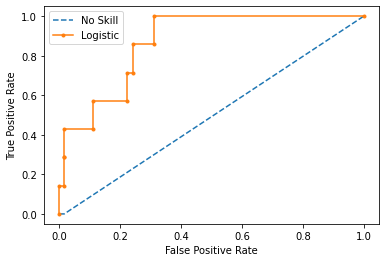

In [10]:

X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

model = DummyClassifier(strategy='stratified')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
naive_probs = yhat[:, 1]

roc_auc = roc_auc_score(testy, naive_probs)
print('No Skill ROC AUC %.3f' % roc_auc)

model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
model_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(testy, model_probs)
print('Logistic ROC AUC %.3f' % roc_auc)
# plot roc curves
plot_roc_curve(testy, naive_probs, model_probs)

# AUC-PRC

In [11]:
# pr curve and pr auc on an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot



In [12]:

def plot_pr_curve(test_y, model_probs):

    no_skill = len(test_y[test_y==1]) / len(test_y)

    pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

    precision, recall, _ = precision_recall_curve(testy, model_probs)
    pyplot.plot(recall, precision, marker='.', label='Logistic')

    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    pyplot.legend()
    pyplot.show()



No Skill PR AUC: 0.007
Logistic PR AUC: 0.228


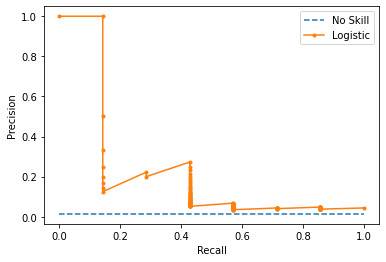

In [13]:

X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

model = DummyClassifier(strategy='stratified')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
naive_probs = yhat[:, 1]

precision, recall, _ = precision_recall_curve(testy, naive_probs)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)

model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
model_probs = yhat[:, 1]

precision, recall, _ = precision_recall_curve(testy, model_probs)
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)
# plot precision-recall curves
plot_pr_curve(testy, model_probs)

In [14]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Updating notebook "tiwari12-rst/metric-part3" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/tiwari12-rst/metric-part3


'https://jovian.ai/tiwari12-rst/metric-part3'